<a href="https://colab.research.google.com/github/jespimentel/estudos_ia/blob/main/03_padroes_classificacao_predicao_com_r.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Linguagem R

### As atualizações e correções deste notebook serão publicadas em <https://github.com/jespimentel/estudos_ia/blob/main/padroes_classificacao_predicao_com_r.ipynb>

# Reconhecimento de padrões e classificação com o uso do dataset BreastCancer do pacote mlbench (da linguagem R)

## Introdução 
O dataset BreastCancer, disponível no pacote "mlbench", contém 699 observações de 11 variáveis, sendo uma delas ("Class") a variável dependente (ou alvo), que rotula a lesão como sendo um câncer ou não ("benign" ou "malignant").

As características do dataframe puderam ser conferidas com os comandos ```str(BreastCancer)```, ```summary(BreastCancer)``` e ```?BreastCancer```.

As variáveis independentes foram convertidas em numéricas gravando-se o dataset em arquivo "csv" e realizando-se sua leitura com o comando ```read.table("bc.csv", header=TRUE, sep=",", stringsAsFactors=FALSE)```.

As bibliotecas utilizadas na análise foram sendo instaladas e chamadas conforme a necessidade e estão indicadas no código.


## Objetivo: reconhecimento de padrões
Realizar análises de reconhecimento de padrões no conjunto BreastCancer. 

## Desenvolvimento
Para o reconhecimento de padrões no conjunto de dados foi preciso supor que a variável “Class” não era conhecida. Um novo dataframe foi criado após a exclusão da coluna-alvo.

Usamos a técnica do PCA (Principal Component Analysis) para a redução do número de variáveis do conjunto de dados, de forma a poder plotar as observações, na tentativa de constatar visualmente os padrões.

Foi visto que os dois componentes principais explicavam 74,17% das variâncias, sendo suficientes para a análise que se pretendia fazer.

Aplicada a técnica, foram plotados os “scores” e gerado o “biplot”, sendo possível delinear os agrupamentos. 

Na sequência, usando o “autoplot” da biblioteca “ggfortify”, agora com a variável “Class” para a coloração das observações, foi possível relacionar os grupos delineados às lesões benignas (em vermelho) e malignas (em azul).  

Por fim, o gráfico gerado permitiu conhecer a contribuição de cada variável para a geração dos componentes principais, havendo um destaque visual para as mitoses, com menor correlação com as demais variáveis. 

## Objetivo: classificação
Realizar análises de classificação com o mesmo conjunto de dados.

## Desenvolvimento
Para a tarefa de classificação, a variável dependente “Class” foi modificada para o tipo “factor”, que informa ao “R” tratar-se de uma variável categórica.

O dataset foi dividido entre treino e teste, na proporção de 80 e 20%, respectivamente. Essa providência é necessária no campo da aprendizagem de máquina supervisionada para a medição da performance do modelo.

Foram usados os algoritmos de árvore de classificação, floresta aleatória com o “mtry” (quantidade de variáveis sorteadas por árvore) de valor 4 e Naive Bayes, com acurácias medidas de, respectivamente, 0,9489, 0,9635 e 0,9562, constatadas a partir da matriz de confusão.

## Conclusão
Os algoritmos disponíveis no pacote “R” permitiram o emprego da técnica do PCA para redução da dimensionalidade do dataset analisado e a plotagem bidimensional das observações favoreceu a identificação visual de padrões no conjunto de dados.

Além disso, o algoritmo de floresta aleatória mostrou ser o mais performático para a tarefa de classificação do conjunto de dados analisado.



In [ ]:
install.packages("mlbench")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [ ]:
install.packages("ggfortify")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependency ‘gridExtra’




In [ ]:
install.packages("factoextra")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘SparseM’, ‘MatrixModels’, ‘minqa’, ‘nloptr’, ‘RcppEigen’, ‘htmltools’, ‘lazyeval’, ‘later’, ‘carData’, ‘pbkrtest’, ‘quantreg’, ‘lme4’, ‘htmlwidgets’, ‘crosstalk’, ‘promises’, ‘estimability’, ‘numDeriv’, ‘mvtnorm’, ‘viridis’, ‘car’, ‘DT’, ‘ellipse’, ‘emmeans’, ‘flashClust’, ‘leaps’, ‘multcompView’, ‘scatterplot3d’, ‘ggsci’, ‘cowplot’, ‘ggsignif’, ‘polynom’, ‘rstatix’, ‘plyr’, ‘Rcpp’, ‘abind’, ‘dendextend’, ‘FactoMineR’, ‘ggpubr’, ‘reshape2’, ‘ggrepel’




In [ ]:
install.packages("caret")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘listenv’, ‘parallelly’, ‘future’, ‘globals’, ‘future.apply’, ‘progressr’, ‘SQUAREM’, ‘lava’, ‘prodlim’, ‘proxy’, ‘iterators’, ‘clock’, ‘gower’, ‘hardhat’, ‘ipred’, ‘timeDate’, ‘e1071’, ‘foreach’, ‘ModelMetrics’, ‘pROC’, ‘recipes’




In [ ]:
install.packages("ggplot2")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [ ]:
install.packages("corrplot")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [ ]:
install.packages("caTools")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [ ]:
install.packages("tree")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [ ]:
install.packages("randomForest")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [ ]:
library (mlbench)
data(BreastCancer) # O comando data() carrega base de dados disponíveis no R
str(BreastCancer)

'data.frame':	699 obs. of  11 variables:
 $ Id             : chr  "1000025" "1002945" "1015425" "1016277" ...
 $ Cl.thickness   : Ord.factor w/ 10 levels "1"<"2"<"3"<"4"<..: 5 5 3 6 4 8 1 2 2 4 ...
 $ Cell.size      : Ord.factor w/ 10 levels "1"<"2"<"3"<"4"<..: 1 4 1 8 1 10 1 1 1 2 ...
 $ Cell.shape     : Ord.factor w/ 10 levels "1"<"2"<"3"<"4"<..: 1 4 1 8 1 10 1 2 1 1 ...
 $ Marg.adhesion  : Ord.factor w/ 10 levels "1"<"2"<"3"<"4"<..: 1 5 1 1 3 8 1 1 1 1 ...
 $ Epith.c.size   : Ord.factor w/ 10 levels "1"<"2"<"3"<"4"<..: 2 7 2 3 2 7 2 2 2 2 ...
 $ Bare.nuclei    : Factor w/ 10 levels "1","2","3","4",..: 1 10 2 4 1 10 10 1 1 1 ...
 $ Bl.cromatin    : Factor w/ 10 levels "1","2","3","4",..: 3 3 3 3 3 9 3 3 1 2 ...
 $ Normal.nucleoli: Factor w/ 10 levels "1","2","3","4",..: 1 2 1 7 1 7 1 1 1 1 ...
 $ Mitoses        : Factor w/ 9 levels "1","2","3","4",..: 1 1 1 1 1 1 1 1 5 1 ...
 $ Class          : Factor w/ 2 levels "benign","malignant": 1 1 1 1 1 2 1 1 1 1 ...


In [ ]:
summary(BreastCancer)

      Id             Cl.thickness   Cell.size     Cell.shape  Marg.adhesion
 Length:699         1      :145   1      :384   1      :353   1      :407  
 Class :character   5      :130   10     : 67   2      : 59   2      : 58  
 Mode  :character   3      :108   3      : 52   10     : 58   3      : 58  
                    4      : 80   2      : 45   3      : 56   10     : 55  
                    10     : 69   4      : 40   4      : 44   4      : 33  
                    2      : 50   5      : 30   5      : 34   8      : 25  
                    (Other):117   (Other): 81   (Other): 95   (Other): 63  
  Epith.c.size  Bare.nuclei   Bl.cromatin  Normal.nucleoli    Mitoses   
 2      :386   1      :402   2      :166   1      :443     1      :579  
 3      : 72   10     :132   3      :165   10     : 61     2      : 35  
 4      : 48   2      : 30   1      :152   3      : 44     3      : 33  
 1      : 47   5      : 30   7      : 73   2      : 36     10     : 14  
 6      : 41   3      : 28 

In [ ]:
df <- data.frame(BreastCancer)
head(df)

,Id,Cl.thickness,Cell.size,Cell.shape,Marg.adhesion,Epith.c.size,Bare.nuclei,Bl.cromatin,Normal.nucleoli,Mitoses,Class
,<chr>,<ord>,<ord>,<ord>,<ord>,<ord>,<fct>,<fct>,<fct>,<fct>,<fct>
1,1000025,5,1,1,1,2,1,3,1,1,benign
2,1002945,5,4,4,5,7,10,3,2,1,benign
3,1015425,3,1,1,1,2,2,3,1,1,benign
4,1016277,6,8,8,1,3,4,3,7,1,benign
5,1017023,4,1,1,3,2,1,3,1,1,benign
6,1017122,8,10,10,8,7,10,9,7,1,malignant


In [ ]:
# Gravação do arquivo csv para usar o mesmo dataframe com Python
write.csv(df, "bc.csv")

## Tarefa 1. Reconhecimento de padrões

In [ ]:
df_numerico <- read.table("bc.csv", header=TRUE, sep=",", stringsAsFactors=FALSE)

In [ ]:
summary(df_numerico)

       X               Id            Cl.thickness      Cell.size     
 Min.   :  1.0   Min.   :   61634   Min.   : 1.000   Min.   : 1.000  
 1st Qu.:175.5   1st Qu.:  870688   1st Qu.: 2.000   1st Qu.: 1.000  
 Median :350.0   Median : 1171710   Median : 4.000   Median : 1.000  
 Mean   :350.0   Mean   : 1071704   Mean   : 4.418   Mean   : 3.134  
 3rd Qu.:524.5   3rd Qu.: 1238298   3rd Qu.: 6.000   3rd Qu.: 5.000  
 Max.   :699.0   Max.   :13454352   Max.   :10.000   Max.   :10.000  
                                                                     
   Cell.shape     Marg.adhesion     Epith.c.size     Bare.nuclei    
 Min.   : 1.000   Min.   : 1.000   Min.   : 1.000   Min.   : 1.000  
 1st Qu.: 1.000   1st Qu.: 1.000   1st Qu.: 2.000   1st Qu.: 1.000  
 Median : 1.000   Median : 1.000   Median : 2.000   Median : 1.000  
 Mean   : 3.207   Mean   : 2.807   Mean   : 3.216   Mean   : 3.545  
 3rd Qu.: 5.000   3rd Qu.: 4.000   3rd Qu.: 4.000   3rd Qu.: 6.000  
 Max.   :10.000   Max.   :

In [ ]:
df_selecao <- na.omit(df_numerico[,3:12]) # Excluindo as observações com valores ausentes (NA)
head(df_selecao)

,Cl.thickness,Cell.size,Cell.shape,Marg.adhesion,Epith.c.size,Bare.nuclei,Bl.cromatin,Normal.nucleoli,Mitoses,Class
,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<chr>
1,5,1,1,1,2,1,3,1,1,benign
2,5,4,4,5,7,10,3,2,1,benign
3,3,1,1,1,2,2,3,1,1,benign
4,6,8,8,1,3,4,3,7,1,benign
5,4,1,1,3,2,1,3,1,1,benign
6,8,10,10,8,7,10,9,7,1,malignant


corrplot 0.92 loaded



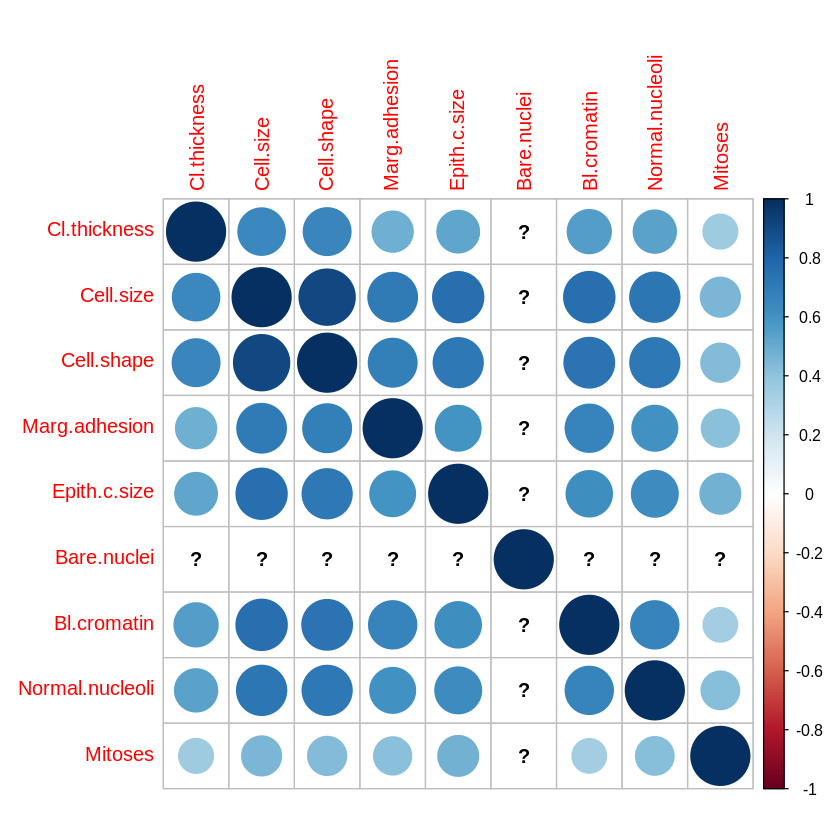

In [ ]:
# Verificando a correlação entre as variáveis
library(corrplot)
corrplot(cor(df_numerico[,3:11]))

In [ ]:
?BreastCancer

In [ ]:
head(df_selecao)

,Cl.thickness,Cell.size,Cell.shape,Marg.adhesion,Epith.c.size,Bare.nuclei,Bl.cromatin,Normal.nucleoli,Mitoses,Class
,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<chr>
1,5,1,1,1,2,1,3,1,1,benign
2,5,4,4,5,7,10,3,2,1,benign
3,3,1,1,1,2,2,3,1,1,benign
4,6,8,8,1,3,4,3,7,1,benign
5,4,1,1,3,2,1,3,1,1,benign
6,8,10,10,8,7,10,9,7,1,malignant


## PCA



In [ ]:
pca <- princomp(df_selecao[, 1:9], cor = TRUE, scores = TRUE) # Exclui a variável alvo "Class"
summary(pca) # Note-se que os comp. 1 e 2 explicam 74,17% das variâncias

Importance of components:
                          Comp.1     Comp.2     Comp.3     Comp.4     Comp.5
Standard deviation     2.4288885 0.88087847 0.73433796 0.67795830 0.61666509
Proportion of Variance 0.6554999 0.08621632 0.05991692 0.05106972 0.04225287
Cumulative Proportion  0.6554999 0.74171625 0.80163316 0.85270288 0.89495575
                           Comp.6     Comp.7     Comp.8      Comp.9
Standard deviation     0.54943284 0.54258890 0.51062301 0.297293154
Proportion of Variance 0.03354183 0.03271141 0.02897065 0.009820358
Cumulative Proportion  0.92849758 0.96120899 0.99017964 1.000000000

In [ ]:
variancias <- var(df_selecao[, 1:9])
variancias

,Cl.thickness,Cell.size,Cell.shape,Marg.adhesion,Epith.c.size,Bare.nuclei,Bl.cromatin,Normal.nucleoli,Mitoses
Cl.thickness,7.956694,5.554922,5.508800,3.941776,3.283363,6.096061,3.826365,4.598758,1.715289
Cell.size,5.554922,9.395113,8.310604,6.207468,5.134708,7.725660,5.673248,6.730824,2.447021
Cell.shape,5.508800,8.310604,8.931615,5.872385,4.799947,7.774099,5.383535,6.550081,2.284936
Marg.adhesion,3.941776,6.207468,5.872385,8.205717,3.786179,7.000264,4.691541,5.274024,2.079140
Epith.c.size,3.283363,5.134708,4.799947,3.786179,4.942109,4.744656,3.366253,4.268107,1.851150
Bare.nuclei,6.096061,7.725660,7.774099,7.000264,4.744656,13.277695,6.075403,6.499229,2.141645
Bl.cromatin,3.826365,5.673248,5.383535,4.691541,3.366253,6.075403,6.001013,4.977439,1.468652
Normal.nucleoli,4.598758,6.730824,6.550081,5.274024,4.268107,6.499229,4.977439,9.318772,2.294262
Mitoses,1.715289,2.447021,2.284936,2.079140,1.851150,2.141645,1.468652,2.294262,3.002160


In [ ]:
loadings <- pca$loadings[, 1:2]
loadings

,Comp.1,Comp.2
Cl.thickness,0.3020626,0.14080053
Cell.size,0.3807930,0.04664031
Cell.shape,0.3775825,0.08242247
Marg.adhesion,0.3327236,0.05209438
Epith.c.size,0.3362340,-0.16440439
Bare.nuclei,0.3350675,0.26126062
Bl.cromatin,0.3457474,0.22807676
Normal.nucleoli,0.3355914,-0.03396582
Mitoses,0.2302064,-0.90555729


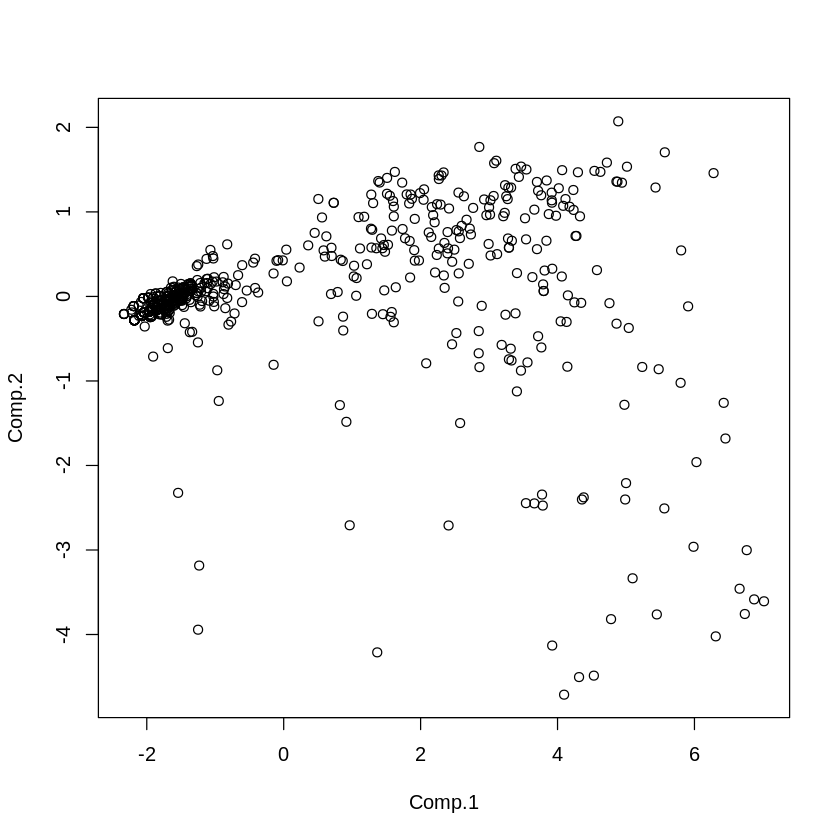

In [ ]:
plot(pca$scores)

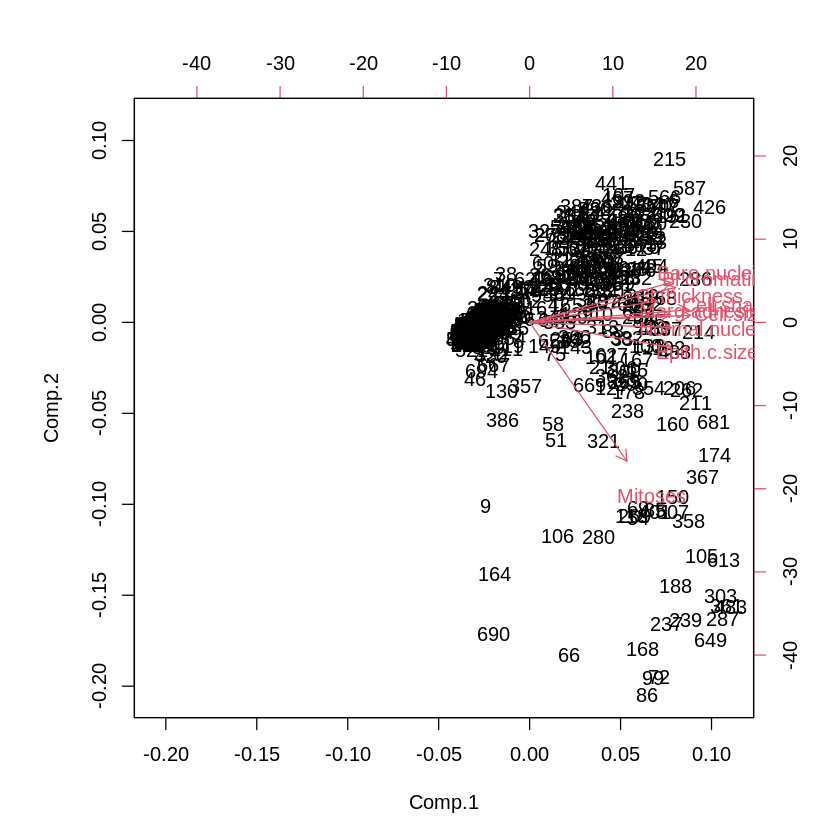

In [ ]:
biplot(pca)

Loading required package: ggplot2



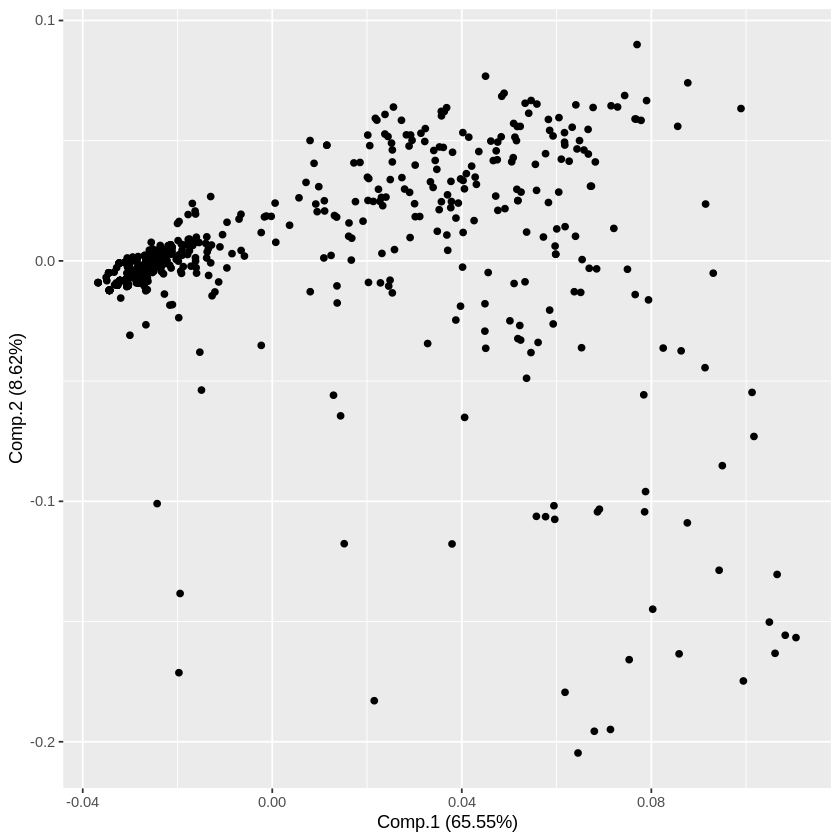

In [ ]:
library(ggfortify)
autoplot(pca)

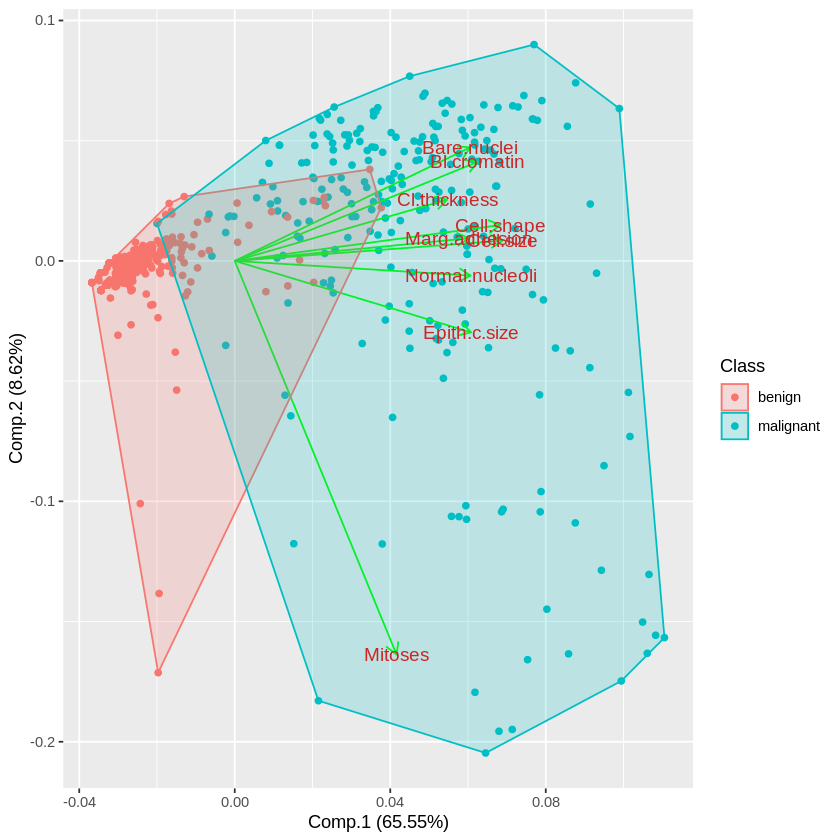

In [ ]:
autoplot(pca, data = df_selecao, colour = 'Class',
         loadings = TRUE, loadings.colour = 'green',
         loadings.label = TRUE, loadings.label.size = 4,
         frame = TRUE)

## Tarefa 2. Classificação

In [ ]:
# Alterando o tipo de variável dependente
df_selecao[, 10] <- as.factor(df_selecao[, 10])

In [ ]:
library(caTools)

In [ ]:
# Dividindo o dataset entre treino e teste

set.seed(17) 
split=sample.split(df_selecao[, 1:10], SplitRatio = 0.8)
dados_treino =subset(df_selecao[, 1:10], split==TRUE)
dados_teste =subset(df_selecao[, 1:10], split==FALSE)

In [ ]:
head(dados_treino)

,Cl.thickness,Cell.size,Cell.shape,Marg.adhesion,Epith.c.size,Bare.nuclei,Bl.cromatin,Normal.nucleoli,Mitoses,Class
,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<fct>
1,5,1,1,1,2,1,3,1,1,benign
3,3,1,1,1,2,2,3,1,1,benign
4,6,8,8,1,3,4,3,7,1,benign
5,4,1,1,3,2,1,3,1,1,benign
6,8,10,10,8,7,10,9,7,1,malignant
7,1,1,1,1,2,10,3,1,1,benign


In [ ]:
summary(dados_treino)

  Cl.thickness      Cell.size        Cell.shape     Marg.adhesion   
 Min.   : 1.000   Min.   : 1.000   Min.   : 1.000   Min.   : 1.000  
 1st Qu.: 2.000   1st Qu.: 1.000   1st Qu.: 1.000   1st Qu.: 1.000  
 Median : 4.000   Median : 1.000   Median : 1.000   Median : 1.000  
 Mean   : 4.487   Mean   : 3.209   Mean   : 3.242   Mean   : 2.905  
 3rd Qu.: 6.000   3rd Qu.: 5.000   3rd Qu.: 5.000   3rd Qu.: 4.000  
 Max.   :10.000   Max.   :10.000   Max.   :10.000   Max.   :10.000  
  Epith.c.size     Bare.nuclei      Bl.cromatin   Normal.nucleoli 
 Min.   : 1.000   Min.   : 1.000   Min.   : 1.0   Min.   : 1.000  
 1st Qu.: 2.000   1st Qu.: 1.000   1st Qu.: 2.0   1st Qu.: 1.000  
 Median : 2.000   Median : 1.000   Median : 3.0   Median : 1.000  
 Mean   : 3.255   Mean   : 3.681   Mean   : 3.5   Mean   : 2.916  
 3rd Qu.: 4.000   3rd Qu.: 8.000   3rd Qu.: 5.0   3rd Qu.: 4.000  
 Max.   :10.000   Max.   :10.000   Max.   :10.0   Max.   :10.000  
    Mitoses             Class    
 Min.   : 1.00

In [ ]:
head(dados_teste)

,Cl.thickness,Cell.size,Cell.shape,Marg.adhesion,Epith.c.size,Bare.nuclei,Bl.cromatin,Normal.nucleoli,Mitoses,Class
,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<fct>
2,5,4,4,5,7,10,3,2,1,benign
9,2,1,1,1,2,1,1,1,5,benign
12,2,1,1,1,2,1,2,1,1,benign
19,10,7,7,6,4,10,4,1,2,malignant
22,10,5,5,3,6,7,7,10,1,malignant
30,1,1,3,1,2,1,1,1,1,benign


In [ ]:
summary(dados_teste)

  Cl.thickness      Cell.size       Cell.shape     Marg.adhesion   
 Min.   : 1.000   Min.   : 1.00   Min.   : 1.000   Min.   : 1.000  
 1st Qu.: 2.000   1st Qu.: 1.00   1st Qu.: 1.000   1st Qu.: 1.000  
 Median : 4.000   Median : 1.00   Median : 1.000   Median : 1.000  
 Mean   : 4.263   Mean   : 2.92   Mean   : 3.109   Mean   : 2.533  
 3rd Qu.: 5.000   3rd Qu.: 4.00   3rd Qu.: 5.000   3rd Qu.: 3.000  
 Max.   :10.000   Max.   :10.00   Max.   :10.000   Max.   :10.000  
  Epith.c.size     Bare.nuclei  Bl.cromatin     Normal.nucleoli 
 Min.   : 1.000   Min.   : 1   Min.   : 1.000   Min.   : 1.000  
 1st Qu.: 2.000   1st Qu.: 1   1st Qu.: 2.000   1st Qu.: 1.000  
 Median : 2.000   Median : 1   Median : 2.000   Median : 1.000  
 Mean   : 3.153   Mean   : 3   Mean   : 3.226   Mean   : 2.686  
 3rd Qu.: 4.000   3rd Qu.: 4   3rd Qu.: 4.000   3rd Qu.: 3.000  
 Max.   :10.000   Max.   :10   Max.   :10.000   Max.   :10.000  
    Mitoses             Class   
 Min.   : 1.000   benign   :97  
 1s

In [ ]:
predicao <- dados_teste[, 1:9]
head(predicao)

,Cl.thickness,Cell.size,Cell.shape,Marg.adhesion,Epith.c.size,Bare.nuclei,Bl.cromatin,Normal.nucleoli,Mitoses
,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
2,5,4,4,5,7,10,3,2,1
9,2,1,1,1,2,1,1,1,5
12,2,1,1,1,2,1,2,1,1
19,10,7,7,6,4,10,4,1,2
22,10,5,5,3,6,7,7,10,1
30,1,1,3,1,2,1,1,1,1


# Árvore de classificação, Floresta Aleatória e Naive Bayes

In [ ]:
library(tree)
arvore <- tree(Class~., data = dados_treino)
arvore

node), split, n, deviance, yval, (yprob)
      * denotes terminal node

 1) root 546 716.300 benign ( 0.635531 0.364469 )  
   2) Cell.size < 2.5 331  96.520 benign ( 0.966767 0.033233 )  
     4) Bare.nuclei < 3.5 309  13.460 benign ( 0.996764 0.003236 )  
       8) Epith.c.size < 4.5 304   0.000 benign ( 1.000000 0.000000 ) *
       9) Epith.c.size > 4.5 5   5.004 benign ( 0.800000 0.200000 ) *
     5) Bare.nuclei > 3.5 22  30.320 benign ( 0.545455 0.454545 )  
      10) Cl.thickness < 3.5 10   0.000 benign ( 1.000000 0.000000 ) *
      11) Cl.thickness > 3.5 12  10.810 malignant ( 0.166667 0.833333 ) *
   3) Cell.size > 2.5 215 162.500 malignant ( 0.125581 0.874419 )  
     6) Cell.size < 3.5 42  58.220 benign ( 0.500000 0.500000 )  
      12) Bare.nuclei < 2.5 17   0.000 benign ( 1.000000 0.000000 ) *
      13) Bare.nuclei > 2.5 25  21.980 malignant ( 0.160000 0.840000 ) *
     7) Cell.size > 3.5 173  52.130 malignant ( 0.034682 0.965318 )  
      14) Bare.nuclei < 8.5 71  41.130 m

In [ ]:
pred_arv <- predict (arvore, dados_teste, type="class")
head(pred_arv)

[1] malignant benign    benign    malignant malignant benign   
Levels: benign malignant

In [ ]:
library(caret)
confusionMatrix(pred_arv, dados_teste$Class)

Loading required package: lattice

Warning message in system("timedatectl", intern = TRUE):
“running command 'timedatectl' had status 1”


Confusion Matrix and Statistics

           Reference
Prediction  benign malignant
  benign        92         2
  malignant      5        38
                                          
               Accuracy : 0.9489          
                 95% CI : (0.8976, 0.9792)
    No Information Rate : 0.708           
    P-Value [Acc > NIR] : 1.023e-12       
                                          
                  Kappa : 0.8791          
                                          
 Mcnemar's Test P-Value : 0.4497          
                                          
            Sensitivity : 0.9485          
            Specificity : 0.9500          
         Pos Pred Value : 0.9787          
         Neg Pred Value : 0.8837          
             Prevalence : 0.7080          
         Detection Rate : 0.6715          
   Detection Prevalence : 0.6861          
      Balanced Accuracy : 0.9492          
                                          
       'Positive' Class : benign          

In [ ]:
# Floresta Aleatória
library(randomForest)

#Ajuste bagging
floresta_aleatoria <- randomForest(Class~., data = dados_treino, mtry = 4)
floresta_aleatoria

randomForest 4.7-1.1

Type rfNews() to see new features/changes/bug fixes.


Attaching package: ‘randomForest’


The following object is masked from ‘package:ggplot2’:

    margin





Call:
 randomForest(formula = Class ~ ., data = dados_treino, mtry = 4) 
               Type of random forest: classification
                     Number of trees: 500
No. of variables tried at each split: 4

        OOB estimate of  error rate: 2.75%
Confusion matrix:
          benign malignant class.error
benign       339         8  0.02305476
malignant      7       192  0.03517588

In [ ]:
pred_floresta <- predict(floresta_aleatoria, dados_teste)
head(pred_floresta)

2         9        12        19        22        30 
malignant    benign    benign malignant malignant    benign 
Levels: benign malignant

In [ ]:
#Avaliação do modelo (Predição)

confusionMatrix(pred_floresta, dados_teste$Class)

Confusion Matrix and Statistics

           Reference
Prediction  benign malignant
  benign        93         1
  malignant      4        39
                                         
               Accuracy : 0.9635         
                 95% CI : (0.9169, 0.988)
    No Information Rate : 0.708          
    P-Value [Acc > NIR] : 1.401e-14      
                                         
                  Kappa : 0.9136         
                                         
 Mcnemar's Test P-Value : 0.3711         
                                         
            Sensitivity : 0.9588         
            Specificity : 0.9750         
         Pos Pred Value : 0.9894         
         Neg Pred Value : 0.9070         
             Prevalence : 0.7080         
         Detection Rate : 0.6788         
   Detection Prevalence : 0.6861         
      Balanced Accuracy : 0.9669         
                                         
       'Positive' Class : benign         
                   

In [ ]:
library(e1071)
model_naive<- naiveBayes(Class ~ ., data = dados_treino)  #Implementing NaiveBayes 

preds_naive <- predict(model_naive, newdata = dados_teste)        #Predicting target class for the Validation set

confusionMatrix(preds_naive, dados_teste$Class)    

Confusion Matrix and Statistics

           Reference
Prediction  benign malignant
  benign        91         0
  malignant      6        40
                                          
               Accuracy : 0.9562          
                 95% CI : (0.9071, 0.9838)
    No Information Rate : 0.708           
    P-Value [Acc > NIR] : 1.298e-13       
                                          
                  Kappa : 0.8985          
                                          
 Mcnemar's Test P-Value : 0.04123         
                                          
            Sensitivity : 0.9381          
            Specificity : 1.0000          
         Pos Pred Value : 1.0000          
         Neg Pred Value : 0.8696          
             Prevalence : 0.7080          
         Detection Rate : 0.6642          
   Detection Prevalence : 0.6642          
      Balanced Accuracy : 0.9691          
                                          
       'Positive' Class : benign          

## Tarefa 3. Predição


# Predição com regressão linear e uso do dateset “Boston Housing Dataset”

# Introdução
O dataset BostonHousing2, disponível no pacote "mlbench", contém 506 observações de 19 variáveis, resultantes de recenseamento realizado em Boston no ano de 1970. A versão (2) resulta da atualização do dataset realizada em 1979, com o acréscimo de informações espaciais (descartadas na presente análise).

As características do dataframe puderam ser conferidas com os comandos str(BostonHousing2), summary(BostonHousing2) e ?BostonHousing2.
Para a realização dos trabalhos, foram desconsideradas as observações com valores ausentes (NA). O dataset foi limitado às colunas "medv", "cmedv", "crim", "zn", "indus", "nox", "rm", "age", "dis", "rad", "tax", "ptratio", "b" e "lstat", cujos significados podem ser conferidos na célula que contém o comando ?BostonHousing2.

As bibliotecas utilizadas na análise foram sendo instaladas e chamadas conforme a necessidade e estão indicadas no código.

# Objetivo
Propôs-se utilizar o conjunto de dados para modelar a predição do valor médio das casas ocupadas pelo proprietário (“medv”) por meio da regressão linear. 

# Desenvolvimento
Para o desenvolvimento do trabalho, o dataset foi dividido entre treino e teste, na proporção de 80 e 20%, respectivamente. A providência é recomendada no campo da aprendizagem de máquina supervisionada e poderia servir à verificação da performance do modelo.

No caso em apreço, utilizou-se a função stepAIC, da biblioteca MASS, para a seleção automática de variáveis. Esse passo é bastante recomendável diante da quantidade de variáveis contidas no conjunto de dados.  

O algoritmo recomendou o uso das variáveis “cmedv”, “tax” e “ptratio”.

A função foi definida em medv = 0.3210913 + 0.9997478 cmedv + 0.0002756 tax  - 0.0229718 ptratio.

# Conclusão
O emprego do método “Stepwise” foi eficiente para a seleção das variáveis.

A regressão linear se mostrou adequada para a predição do valor médio das casas ocupadas pelo proprietário (“medv”) com base em 3 variáveis independentes (“cmedv”, “tax” e “ptratio”).

In [ ]:
# Uso do dataset "Boston Housing Dataset"
data(BostonHousing2)
str(BostonHousing2)

'data.frame':	506 obs. of  19 variables:
 $ town   : Factor w/ 92 levels "Arlington","Ashland",..: 54 77 77 46 46 46 69 69 69 69 ...
 $ tract  : int  2011 2021 2022 2031 2032 2033 2041 2042 2043 2044 ...
 $ lon    : num  -71 -71 -70.9 -70.9 -70.9 ...
 $ lat    : num  42.3 42.3 42.3 42.3 42.3 ...
 $ medv   : num  24 21.6 34.7 33.4 36.2 28.7 22.9 27.1 16.5 18.9 ...
 $ cmedv  : num  24 21.6 34.7 33.4 36.2 28.7 22.9 22.1 16.5 18.9 ...
 $ crim   : num  0.00632 0.02731 0.02729 0.03237 0.06905 ...
 $ zn     : num  18 0 0 0 0 0 12.5 12.5 12.5 12.5 ...
 $ indus  : num  2.31 7.07 7.07 2.18 2.18 2.18 7.87 7.87 7.87 7.87 ...
 $ chas   : Factor w/ 2 levels "0","1": 1 1 1 1 1 1 1 1 1 1 ...
 $ nox    : num  0.538 0.469 0.469 0.458 0.458 0.458 0.524 0.524 0.524 0.524 ...
 $ rm     : num  6.58 6.42 7.18 7 7.15 ...
 $ age    : num  65.2 78.9 61.1 45.8 54.2 58.7 66.6 96.1 100 85.9 ...
 $ dis    : num  4.09 4.97 4.97 6.06 6.06 ...
 $ rad    : int  1 2 2 3 3 3 5 5 5 5 ...
 $ tax    : int  296 242 242 222 2

In [ ]:
summary(BostonHousing2)

                town         tract           lon              lat       
 Cambridge        : 30   Min.   :   1   Min.   :-71.29   Min.   :42.03  
 Boston Savin Hill: 23   1st Qu.:1303   1st Qu.:-71.09   1st Qu.:42.18  
 Lynn             : 22   Median :3394   Median :-71.05   Median :42.22  
 Boston Roxbury   : 19   Mean   :2700   Mean   :-71.06   Mean   :42.22  
 Newton           : 18   3rd Qu.:3740   3rd Qu.:-71.02   3rd Qu.:42.25  
 Somerville       : 15   Max.   :5082   Max.   :-70.81   Max.   :42.38  
 (Other)          :379                                                  
      medv           cmedv            crim                zn        
 Min.   : 5.00   Min.   : 5.00   Min.   : 0.00632   Min.   :  0.00  
 1st Qu.:17.02   1st Qu.:17.02   1st Qu.: 0.08205   1st Qu.:  0.00  
 Median :21.20   Median :21.20   Median : 0.25651   Median :  0.00  
 Mean   :22.53   Mean   :22.53   Mean   : 3.61352   Mean   : 11.36  
 3rd Qu.:25.00   3rd Qu.:25.00   3rd Qu.: 3.67708   3rd Qu.: 12.50  
 M

In [ ]:
?BostonHousing2

In [ ]:
# Limpeza dos dados
df_1 <- na.omit(BostonHousing2)

In [ ]:
# Limitando o dataframe com as variáveis selecionadas

colunas_selecionadas <- c("medv" , "cmedv", "crim", "zn", "indus", 
  "nox", "rm", "age", "dis", "rad", "tax", "ptratio", "b" , "lstat")

df_1 <- subset (df_1, select = colunas_selecionadas)
head(df_1)

,medv,cmedv,crim,zn,indus,nox,rm,age,dis,rad,tax,ptratio,b,lstat
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<int>,<dbl>,<dbl>,<dbl>
1,24.0,24.0,0.00632,18,2.31,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98
2,21.6,21.6,0.02731,0,7.07,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14
3,34.7,34.7,0.02729,0,7.07,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03
4,33.4,33.4,0.03237,0,2.18,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94
5,36.2,36.2,0.06905,0,2.18,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33
6,28.7,28.7,0.02985,0,2.18,0.458,6.430,58.7,6.0622,3,222,18.7,394.12,5.21


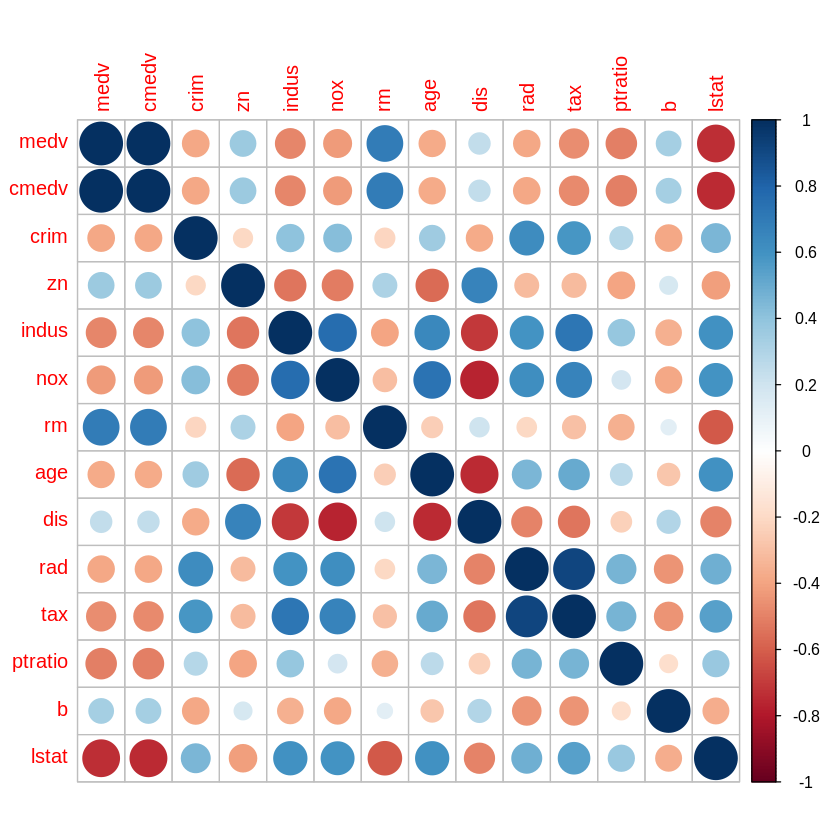

In [ ]:
# Verificando a correlação entre as variáveis
corrplot(cor(df_1))

In [ ]:
# Seleção automática das variáveis (usando a função stepAIC)
library(MASS)

# Método Stepwise
mod1 <- lm(medv~.,data=df_1)
stepwise <- stepAIC(mod1, direction= "both", trace= 2)
stepwise

Start:  AIC=-668.77
medv ~ cmedv + crim + zn + indus + nox + rm + age + dis + rad + 
    tax + ptratio + b + lstat

          Df Sum of Sq     RSS     AIC
- nox      1       0.0   127.7 -670.77
- age      1       0.0   127.7 -670.77
- rad      1       0.0   127.7 -670.74
- rm       1       0.0   127.7 -670.74
- b        1       0.0   127.7 -670.74
- crim     1       0.0   127.7 -670.60
- indus    1       0.0   127.7 -670.58
- zn       1       0.2   127.9 -669.79
- tax      1       0.3   128.0 -669.69
- lstat    1       0.4   128.1 -669.14
- dis      1       0.5   128.2 -668.85
<none>                   127.7 -668.77
- ptratio  1       0.8   128.5 -667.64
- cmedv    1   11170.1 11297.8 1597.55

Step:  AIC=-670.77
medv ~ cmedv + crim + zn + indus + rm + age + dis + rad + tax + 
    ptratio + b + lstat

          Df Sum of Sq     RSS     AIC
- age      1       0.0   127.7 -672.76
- rm       1       0.0   127.7 -672.74
- b        1       0.0   127.7 -672.73
- rad      1       0.0   127.7 -6


Call:
lm(formula = medv ~ cmedv + tax + ptratio, data = df_1)

Coefficients:
(Intercept)        cmedv          tax      ptratio  
  0.3210913    0.9997478    0.0002756   -0.0229718  


In [ ]:
# Divisão do dataset em treino e teste
library(caTools)
set.seed(3)
split <- sample.split(df_1, SplitRatio = 0.80) 
treino <- subset(df_1,split==TRUE)
teste <- subset(df_1,split==FALSE)

In [ ]:
# Rodando a Regressão Linear com dados de treino

lm_treino <- lm(medv ~ cmedv + tax + ptratio, data = treino)
summary(lm_treino)


Call:
lm(formula = medv ~ cmedv + tax + ptratio, data = treino)

Residuals:
    Min      1Q  Median      3Q     Max 
-5.0284 -0.0472 -0.0226  0.0050  4.9460 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)  0.2365301  0.2634350   0.898    0.370    
cmedv        0.9991676  0.0030221 330.624   <2e-16 ***
tax          0.0001597  0.0001584   1.008    0.314    
ptratio     -0.0140691  0.0126573  -1.112    0.267    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.4487 on 393 degrees of freedom
Multiple R-squared:  0.9976,	Adjusted R-squared:  0.9976 
F-statistic: 5.416e+04 on 3 and 393 DF,  p-value: < 2.2e-16


In [ ]:
lm_teste <- lm(medv ~ cmedv + tax + ptratio, data = teste)
summary(lm_teste)


Call:
lm(formula = medv ~ cmedv + tax + ptratio, data = teste)

Residuals:
    Min      1Q  Median      3Q     Max 
-6.7832 -0.0128  0.0424  0.1660  0.3291 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)  0.6769297  0.7502752   0.902    0.369    
cmedv        1.0006338  0.0083965 119.173   <2e-16 ***
tax          0.0007200  0.0004623   1.557    0.122    
ptratio     -0.0572519  0.0361682  -1.583    0.116    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.6773 on 105 degrees of freedom
Multiple R-squared:  0.9951,	Adjusted R-squared:  0.995 
F-statistic:  7172 on 3 and 105 DF,  p-value: < 2.2e-16


## Outros ensaios

In [ ]:
library(factoextra)

Welcome! Want to learn more? See two factoextra-related books at https://goo.gl/ve3WBa



In [ ]:
# K-means
agrupamentos <- kmeans(dados_treino[, 1:9], centers = 2)
agrupamentos

K-means clustering with 2 clusters of sizes 356, 190

Cluster means:
  Cl.thickness Cell.size Cell.shape Marg.adhesion Epith.c.size Bare.nuclei
1     3.081461  1.286517   1.401685      1.390449     2.087079    1.339888
2     7.121053  6.810526   6.689474      5.742105     5.442105    8.068421
  Bl.cromatin Normal.nucleoli  Mitoses
1    2.092697        1.233146 1.092697
2    6.136842        6.068421 2.647368

Clustering vector:
  1   3   4   5   6   7   8  10  11  13  14  15  16  17  18  20  21  23  25  26 
  1   1   2   1   2   1   1   1   1   1   1   2   1   1   1   1   2   1   1   1 
 27  28  29  31  32  34  35  36  37  38  39  42  43  45  46  47  48  49  50  52 
  1   1   1   1   1   1   1   1   2   1   2   2   2   2   1   2   1   1   2   1 
 53  55  56  57  58  59  60  62  63  65  66  67  68  69  70  72  73  75  76  77 
  2   2   2   2   1   2   1   1   2   1   1   1   2   2   1   2   1   2   1   1 
 78  79  80  82  83  85  86  87  88  89  90  92  93  95  96  97  98  99 100 102 
  

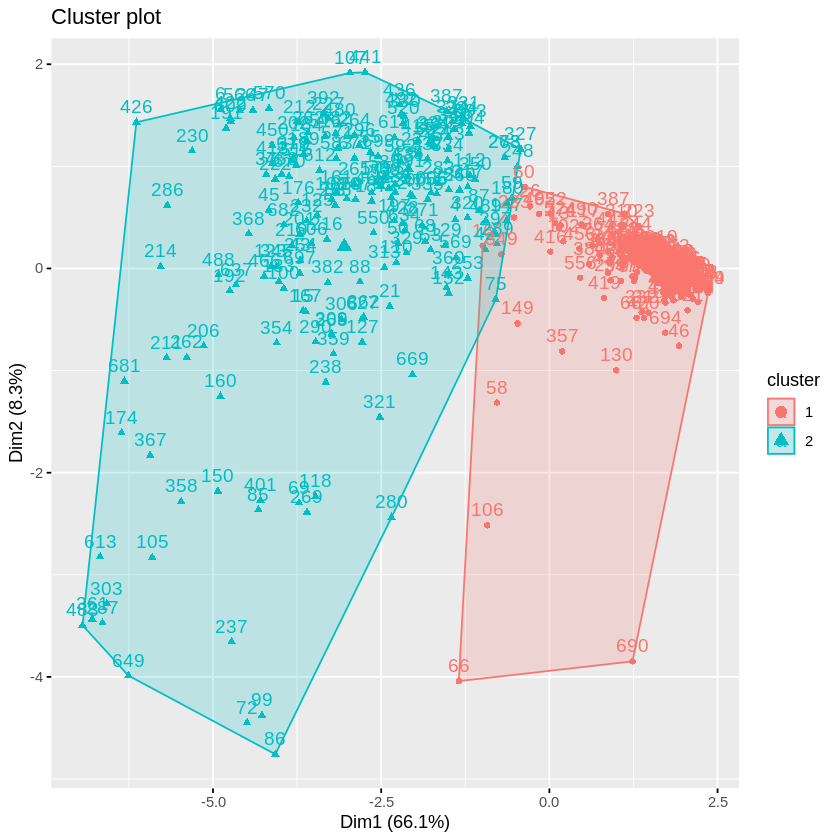

In [ ]:
cluster_plot <- fviz_cluster(agrupamentos, data = dados_treino[, 1:9])
cluster_plot

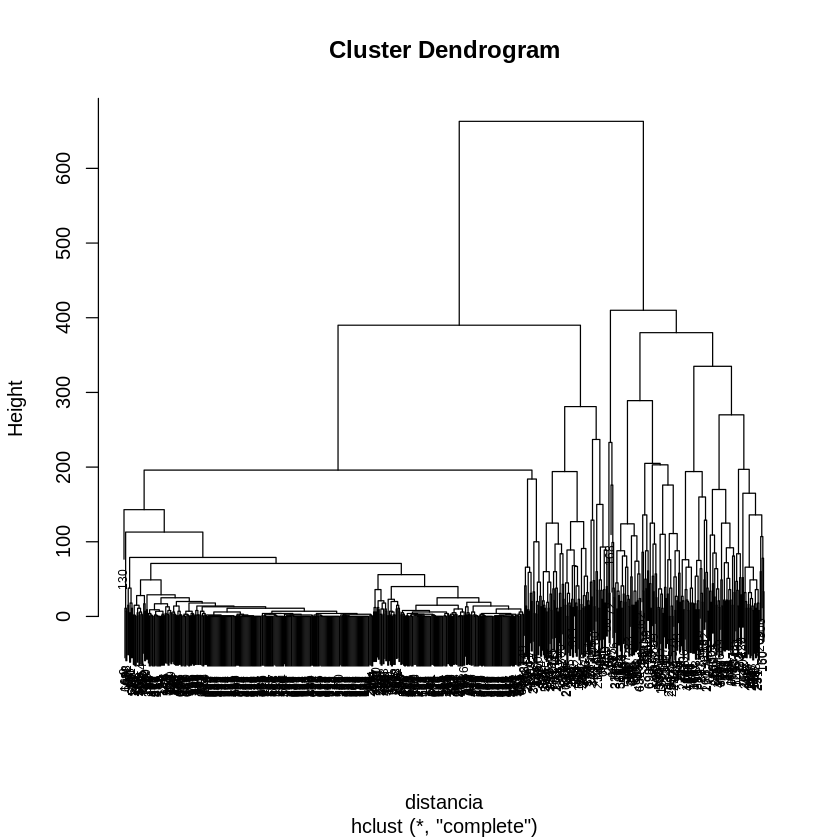

In [ ]:
distancia <- dist(df_selecao[, 1:9], method = 'euclidian')^2
agrup_hierarquico <- hclust(distancia, method = 'complete')
plot(agrup_hierarquico, cex=0.6)

Referências:

CRAN.R.PROJECT.ORG. Plotting PCA (Principal Component Analysis). Disponível em: <https://cran.r-project.org/web/packages/ggfortify/vignettes/plot_pca.html>. Acesso em: 3 Jan. 2023.

MONIZ, Paulo. Uma abordagem prática para avaliar o desempenho de algoritmos para um problema de classificação binária em um projeto de machine learning. Disponível em: <https://rpubs.com/PMONIZ80/506010>. Acesso em: 3 Jan. 2023.

MORETTIN, Pedro Alberto; SINGER, Júlio da Morra. Estatística e ciência de dados, 1ª. ed., Rio de Janeiro: LTC, 2022.

PÉREZ, Fernando L. MLExemplo09: regressão logística. Disponível em: <http://leg.ufpr.br/~lucambio/CE225/20211S/MLGExemplo09.html>. Acesso em: 3 Jan. 2023.

SAMINATHAN. Breast Cancer Classification Problem Analysis. 29 mar. 2018. Disponível em: <https://rstudio-pubs-static.s3.amazonaws.com/374852_57bcde1cc74f4950ab66a6a6d58781a5.html>. Acesso em: 3 Jan. 2023.
